# 🏡 House Price Prediction using Simple Linear Regression

---

## 📌 Project Overview

In this project, we aim to predict **house prices** using **Simple Linear Regression** with:
- 📐 `area` (square footage)
- 🛏️ `bedrooms`

We’ll follow a complete Data Science pipeline using:
- **Python**
- **Pandas**
- **Scikit-learn**

---

## 🔽 Step 1: Load the Dataset

In [14]:

# Import necessary libraries
import pandas as pd

# Load dataset from a public source
file = "Housing.csv"
df = pd.read_csv(file)

# Display the first few rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 🧾 Step 2: Initial Data Understanding

In [21]:
# Get data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [23]:
# Get statistical summary
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [25]:
# Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## 🔍 Step 3: Select Relevant Features

In [33]:
# Select only numerical features for simple regression
X = df[['area', 'bedrooms']]  # Features
y = df['price']               # Target

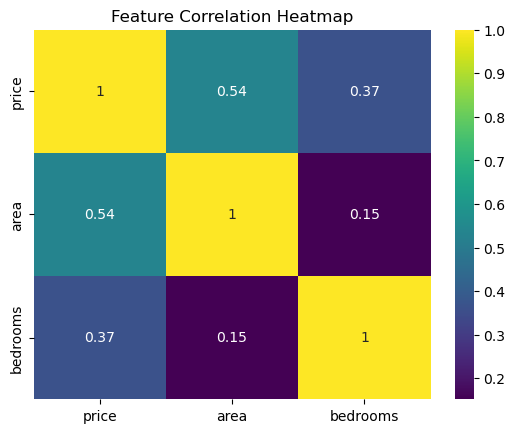

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
sns.heatmap(df[['price', 'area', 'bedrooms']].corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

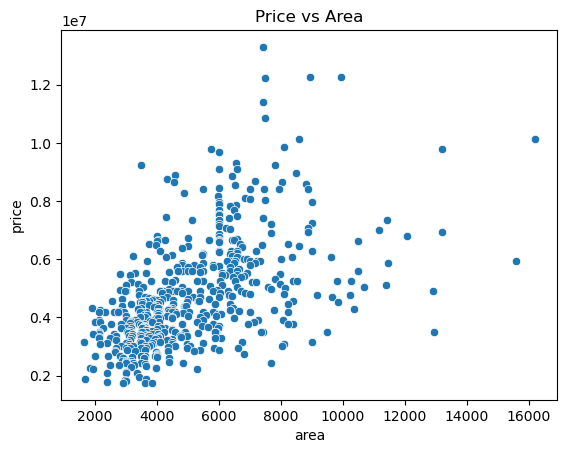

In [37]:
# Scatter plots
sns.scatterplot(x='area', y='price', data=df)
plt.title("Price vs Area")
plt.show()

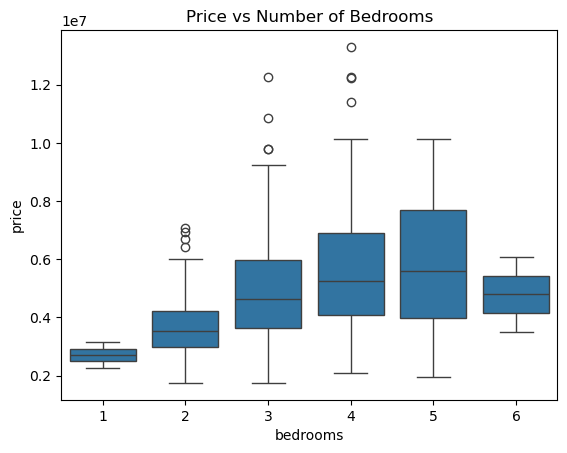

In [41]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Price vs Number of Bedrooms")
plt.show()

## ✂️ Step 5: Split the Data

In [44]:
from sklearn.model_selection import train_test_split

# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## 🧠 Step 6: Build and Train the Model

In [47]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 📈 Step 7: Predict and Evaluate

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("R² Score       :", r2_score(y_test, y_pred))
print("MAE            :", mean_absolute_error(y_test, y_pred))
print("MSE            :", mean_squared_error(y_test, y_pred))
print("RMSE           :", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score       : 0.3510473817558727
MAE            : 1381158.8954117913
MSE            : 3280176595474.0127
RMSE           : 1811125.7812405003


## 📊 Step 8: Visualize Predictions

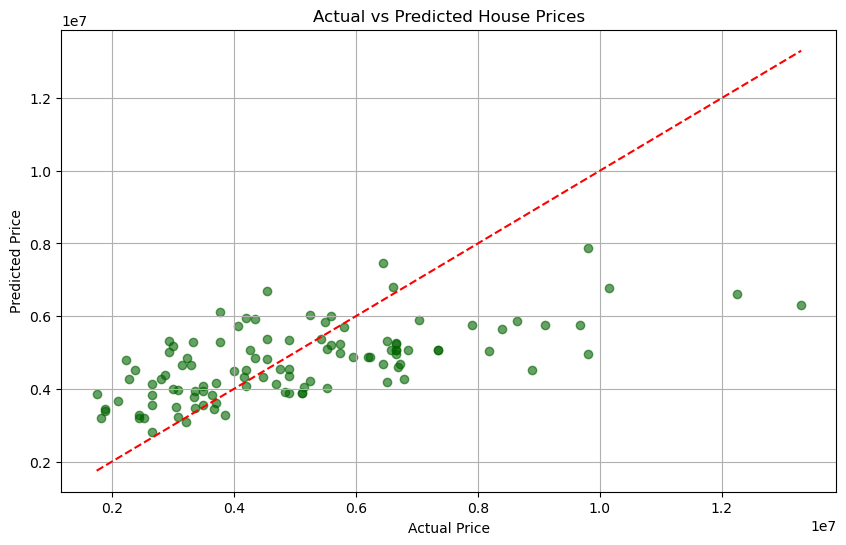

In [53]:
# Actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='darkgreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

## ✅ Conclusion & Key Takeaways
+ Objective: Predict house prices based on area and number of bedrooms.

+ Observation: area has a stronger impact on price than bedrooms.

+ Model Accuracy: R² score shows reasonable predictive power for a simple linear model.

+ Next Steps: Incorporate categorical features using encoding and try more advanced models like Ridge, Lasso, or Tree-based regressors.
